## Prática 6: Mapa composto de área de estudo

Lara Schlumbom, dezembro de 2023

Prestar atenção a labels, unidades e colormaps.
Salvar as figuras em .png.

In [158]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import gsw
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy                   # contém todos as outras funções/classes/métodos do cartopy

### Passo 1: Mapa base

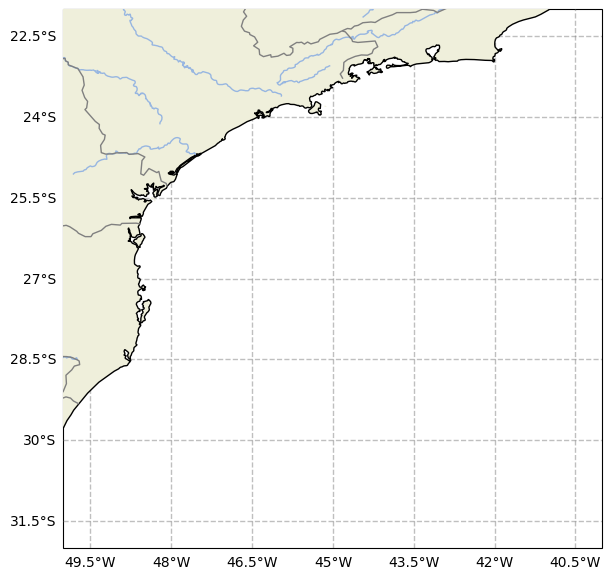

In [166]:
# define the area and the central longitude and latitudes
central_lon = -45
central_lat = -27
area = [-50,-40,-32,-22]

# plot figures and axes
plt.figure(figsize= (7,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(area)

# add the basic features needed for the visualization
ax.add_feature(cfeature.LAND, zorder=5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=6)
ax.add_feature(cfeature.RIVERS, zorder=7)

# create states' parameters
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='gray', zorder=8)

# create gridlines and labels
grid = ax.gridlines(crs=ccrs.PlateCarree(),
                    draw_labels=True,
                    linewidth=1,
                    color='gray',
                    alpha=.5,
                    linestyle='--',
                    zorder=4)
grid.top_labels, grid.right_labels = False, False

### Passo 2: Dados de SST

In [81]:
url_1 = 'http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.mon.ltm.1991-2020.nc'
mean = xr.open_dataset(url_1, decode_times=False)

In [82]:
mean.coords['lon'] = (mean.coords['lon'] + 180) % 360 - 180
mean = mean.sortby(mean.lon).sel(lat=slice(-32,-22), lon=slice(-50,-40))
mean

<xarray.Dataset>
Dimensions:             (lat: 40, lon: 40, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 -31.88 -31.62 -31.38 ... -22.38 -22.12
  * lon                 (lon) float32 -49.88 -49.62 -49.38 ... -40.38 -40.12
  * time                (time) float64 -6.571e+05 -6.57e+05 ... -6.567e+05
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    sst                 (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Conventions:                    CF-1.5
    title:                          NOAA/NCEI 1/4 Degree Daily Optimum Interp...
    institution:                    NOAA/National Centers for Environmental I...
    source:                         NOAA/NCEI https://www.ncei.noaa.gov/data/...
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    dataset_title:                  NOAA Daily Optimum Interpolation Sea Surf...
    version:                        Version 2.1
    comment:                        Reynolds, et al.(2007) Daily High-Resolut...
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    _NCProperties:                  version=2,netcdf=4.7.0,hdf5=1.10.5,

In [113]:
url_2 = 'http://psl.noaa.gov/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.anom.2023.nc'
anomaly = xr.open_dataset(url_2)

In [118]:
anomaly.coords['lon'] = (anomaly.coords['lon'] + 180) % 360 - 180
anomaly = anomaly.sortby(anomaly.lon).sel(lat=slice(-32,-22), lon=slice(-50,-40)).sel(time=slice('2023-4-1','2023-4-30')).mean('time')
anomaly

<xarray.Dataset>
Dimensions:  (lat: 40, lon: 40)
Coordinates:
  * lat      (lat) float32 -31.88 -31.62 -31.38 -31.12 ... -22.62 -22.38 -22.12
  * lon      (lon) float32 -49.88 -49.62 -49.38 -49.12 ... -40.62 -40.38 -40.12
Data variables:
    anom     (lat, lon) float32 1.502 1.543 1.478 ... -0.643 -0.02033 0.6143

In [85]:
mean = mean.mean('time')
mean

<xarray.Dataset>
Dimensions:             (lat: 40, lon: 40, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 -31.88 -31.62 -31.38 ... -22.38 -22.12
  * lon                 (lon) float32 -49.88 -49.62 -49.38 ... -40.38 -40.12
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (nbnds) float64 6.993e+04 8.052e+04
    sst                 (lat, lon) float32 21.61 21.92 22.03 ... 24.32 24.81
    valid_yr_count      (lat, lon) float32 30.0 30.0 30.0 ... 30.0 30.0 30.0

In [119]:
sst = mean.sst + anomaly.anom
sst

<xarray.DataArray (lat: 40, lon: 40)>
array([[23.111351, 23.461203, 23.51132 , ..., 20.843119, 20.91232 ,
        20.98871 ],
       [22.81764 , 23.289345, 23.49906 , ..., 21.180597, 21.251057,
        21.301582],
       [22.419008, 22.98009 , 23.343266, ..., 21.42375 , 21.487347,
        21.509861],
       ...,
       [      nan,       nan,       nan, ..., 24.91693 , 25.583899,
        26.09798 ],
       [      nan,       nan,       nan, ..., 23.975498, 24.852879,
        25.708233],
       [      nan,       nan,       nan, ..., 23.280903, 24.302513,
        25.422316]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -31.88 -31.62 -31.38 -31.12 ... -22.62 -22.38 -22.12
  * lon      (lon) float32 -49.88 -49.62 -49.38 -49.12 ... -40.62 -40.38 -40.12

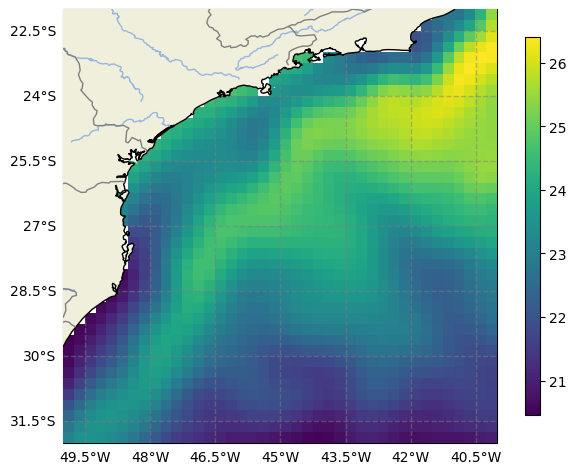

In [165]:
# define the area and the central longitude and latitudes
central_lon = -45
central_lat = -27
area = [-50,-40,-32,-22]

# plot figures and axes
plt.figure(figsize= (7,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(area)

# add the basic features needed for the visualization
ax.add_feature(cfeature.LAND, zorder=5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=6)
ax.add_feature(cfeature.RIVERS, zorder=7)

# create states' parameters
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='gray', zorder=8)

# create gridlines and labels
grid = ax.gridlines(crs=ccrs.PlateCarree(),
                    draw_labels=True,
                    linewidth=1,
                    color='gray',
                    alpha=.5,
                    linestyle='--',
                    zorder=4)
grid.top_labels, grid.right_labels = False, False

# plot sea surface temperature data
temp = sst.plot.imshow(transform=ccrs.PlateCarree(),
                       add_labels = False,
                       cbar_kwargs = {'shrink': 0.7, 'aspect': 25},
                       zorder=4)

### Passo 3: Dados de Topografia

In [38]:
url_3 = 'https://www.ngdc.noaa.gov/thredds/dodsC/global/ETOPO2022/30s/30s_bed_elev_netcdf/ETOPO_2022_v1_30s_N90W180_bed.nc'
topo = xr.open_dataset(url_3)
topo

<xarray.Dataset>
Dimensions:  (lat: 21600, lon: 43200)
Coordinates:
  * lat      (lat) float64 -90.0 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99 90.0
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    crs      |S64 ...
    z        (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    _NCProperties:                  version=2,netcdf=4.8.1,hdf5=1.12.1
    DODS.strlen:                    0

In [42]:
topo = topo.sel(lat=slice(-32,-22), lon=slice(-50,-40))
topo

<xarray.Dataset>
Dimensions:  (lat: 1200, lon: 1200)
Coordinates:
  * lat      (lat) float64 -32.0 -31.99 -31.98 -31.97 ... -22.02 -22.01 -22.0
  * lon      (lon) float64 -50.0 -49.99 -49.98 -49.97 ... -40.02 -40.01 -40.0
Data variables:
    crs      |S64 ...
    z        (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:             Area
    node_offset:                    1
    GDAL_TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers f...
    GDAL_TIFFTAG_DATETIME:          20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    Conventions:                    CF-1.5
    GDAL:                           GDAL 3.3.2, released 2021/09/01
    NCO:                            netCDF Operators version 4.9.1 (Homepage ...
    _NCProperties:                  version=2,netcdf=4.8.1,hdf5=1.12.1
    DODS.strlen:                    0

<a list of 4 text.Text objects>

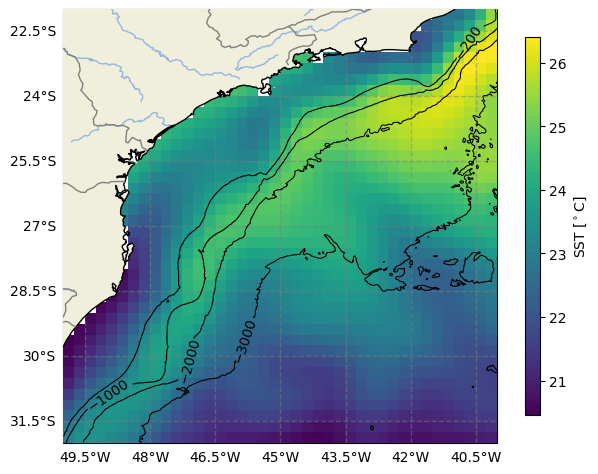

In [176]:
# define the area and the central longitude and latitudes
central_lon = -45
central_lat = -27
area = [-50,-40,-32,-22]

# plot figures and axes
plt.figure(figsize= (7,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(area)

# add the basic features needed for the visualization
ax.add_feature(cfeature.LAND, zorder=6)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=7)
ax.add_feature(cfeature.RIVERS, zorder=8)

# create states' parameters
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='gray', zorder=9)

# create gridlines and labels
grid = ax.gridlines(crs=ccrs.PlateCarree(),
                    draw_labels=True,
                    linewidth=1,
                    color='gray',
                    alpha=.5,
                    linestyle='--',
                    zorder=4)
grid.top_labels, grid.right_labels = False, False

# plot sea surface temperature data
temp = sst.plot.imshow(transform=ccrs.PlateCarree(),
                       add_labels = False,
                       cbar_kwargs = {'shrink': 0.7, 'aspect': 25, 'label': r'SST [$^\circ$C]'},
                       zorder=4)

# plot topography/bathymetric isolines
levels =  np.array([-3000,-2000,-1000,-200])

bathy = topo.z.plot.contour(levels=levels,
                    transform=ccrs.PlateCarree(),
                    colors='k',
                    linewidths=.8,
                    linestyles='solid',
                    zorder=5)
plt.clabel(bathy)

### Passo 4: Posições das estações oceanográficas e inset de contexto

In [178]:
sites = pd.read_csv('/data/misc/CTD_stations_SANBIF.csv')
sites

,stations,longitude,latitude
0,1,-47.919355,-28.694026
1,2,-47.743952,-28.721234
2,3,-47.568548,-28.748442
3,4,-47.393145,-28.775649
4,5,-47.217742,-28.802857
5,6,-47.042339,-28.830065
6,7,-46.866935,-28.857273
7,8,-46.691532,-28.884481
8,9,-46.516129,-28.911688
9,10,-46.951613,-26.735065


In [187]:
sites = sites.set_index(sites.stations)

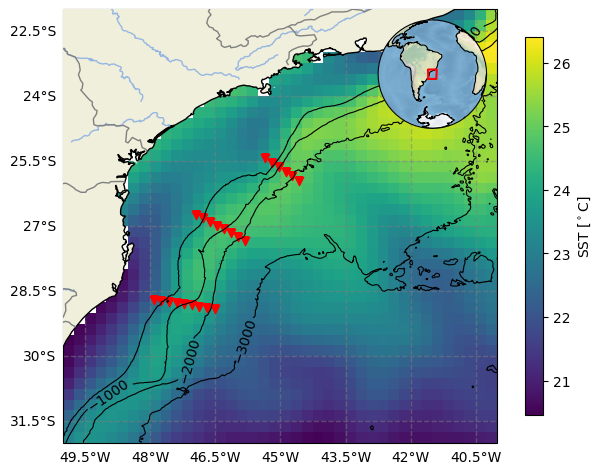

In [219]:
# define the area and the central longitude and latitudes
central_lon = -45
central_lat = -27
area = [-50,-40,-32,-22]

# plot figures and main axis
plt.figure(figsize= (7,7))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(area)

# add the basic features needed for the visualization (continent)
ax.add_feature(cfeature.LAND, zorder=5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', zorder=6)
ax.add_feature(cfeature.RIVERS, zorder=7)

# create states' parameters
states = cfeature.NaturalEarthFeature(category='cultural',
                                      name='admin_1_states_provinces_lines',
                                      scale='50m',
                                      facecolor='none')
ax.add_feature(states, edgecolor='gray', zorder=8)

# create gridlines and remove labels
grid = ax.gridlines(crs=ccrs.PlateCarree(),
                    draw_labels=True,
                    linewidth=1,
                    color='gray',
                    alpha=.5,
                    linestyle='--',
                    zorder=2)
grid.top_labels, grid.right_labels = False, False

# plot sea surface temperature data
# adjust colorbar and remove labels
temp = sst.plot.imshow(transform=ccrs.PlateCarree(),
                       add_labels = False,
                       cbar_kwargs = {'shrink': 0.7, 'label': r'SST [$^\circ$C]'},
                       zorder=1)

# plot topography/bathymetric isolines
# define levels and add their labels
levels =  np.array([-3000,-2000,-1000,-200])

bathy = topo.z.plot.contour(levels=levels,
                    transform=ccrs.PlateCarree(),
                    colors='k',
                    linewidths=.8,
                    linestyles='solid',
                    zorder=4)
plt.clabel(bathy)

# create inset axis, define its location and size using the main axis coordinates
# add features to the inset axis
ax2 = ax.inset_axes(bounds=[-42.75,-24.75,2.5,2.5],
                   transform=ax.transData,
                   projection=ccrs.Orthographic(central_longitude=central_lon, central_latitude=central_lat),
                   zorder=9)
ax2.stock_img()
ax2.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=.8)

# define the regional area used on the main axis and plot them for context on the inset axis
regional_area = {'lon': [-50,-40,-40,-50,-50],
                 'lat': [-32,-32,-22,-22,-32]}
ax2.plot(regional_area['lon'],
        regional_area['lat'],
        transform=ccrs.PlateCarree(),
        color='r')

# plot oceanographic stations coordinates
ax.scatter(sites.longitude, sites.latitude, marker='v', c='r', zorder=3)

# save image
# plt.savefig('p6_mapa_area_estudo.png', bbox_inches='tight')